In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import warnings


warnings.filterwarnings('ignore')

%matplotlib inline

In [35]:
df = pd.read_csv('tip_dataset.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
df.info()
print("\nMissing Values:\n", df.isnull().sum())

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB

Missing Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


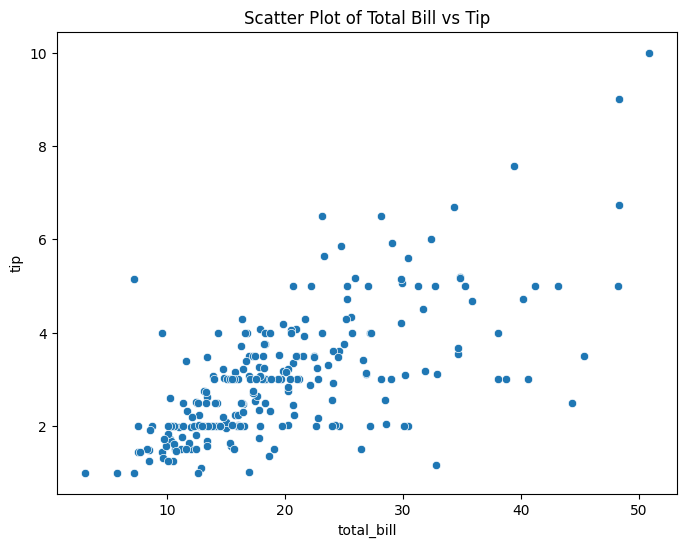

In [9]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

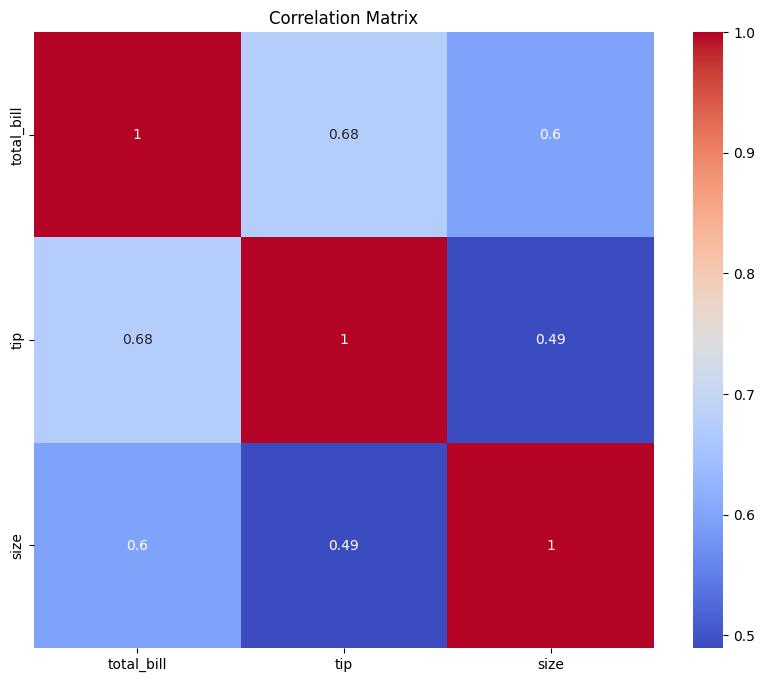

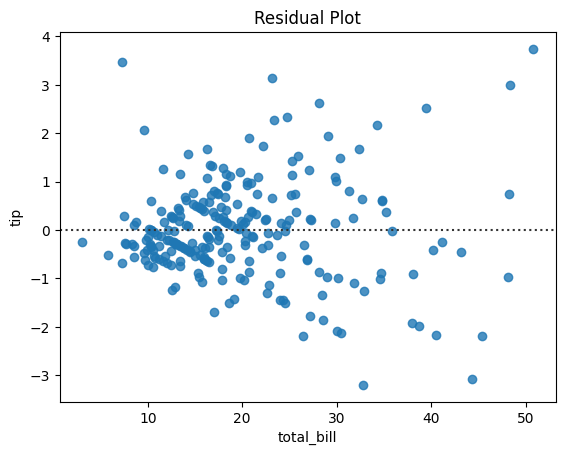

In [15]:
sns.residplot(x='total_bill', y='tip', data=df)
plt.title('Residual Plot')
plt.show()


In [67]:
X = df.drop('tip', axis=1)
y = df['tip']
label_enc = LabelEncoder()
X['sex'] = label_enc.fit_transform(X['sex'])
X['smoker'] = label_enc.fit_transform(X['smoker'])
X['day'] = label_enc.fit_transform(X['day'])
X['time'] = label_enc.fit_transform(X['time'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (195, 6)
Test set size: (49, 6)


In [43]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MAE: {mae_lr}, MSE: {mse_lr}, R2 Score: {r2_lr}")


Linear Regression Results:
MAE: 0.6703807496461158, MSE: 0.6948129686287711, R2 Score: 0.4441368826121931


In [45]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print(f"MAE: {mae_ridge}, MSE: {mse_ridge}, R2 Score: {r2_ridge}")


Ridge Regression Results:
MAE: 0.6696786385911097, MSE: 0.6927491774762524, R2 Score: 0.44578795338299404


In [47]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Results:")
print(f"MAE: {mae_lasso}, MSE: {mse_lasso}, R2 Score: {r2_lasso}")


Lasso Regression Results:
MAE: 0.6256100264339349, MSE: 0.5665976098709373, R2 Score: 0.5467115210170848


In [49]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression Results:")
print(f"MAE: {mae_dt}, MSE: {mse_dt}, R2 Score: {r2_dt}")


Decision Tree Regression Results:
MAE: 0.8612244897959185, MSE: 1.321534693877551, R2 Score: -0.0572519913159526


In [51]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, R2 Score: {r2_rf}")


Random Forest Regression Results:
MAE: 0.7531897959183674, MSE: 0.8995352548979602, R2 Score: 0.2803552991035655


In [53]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Results:")
print(f"MAE: {mae_svr}, MSE: {mse_svr}, R2 Score: {r2_svr}")


Support Vector Regression Results:
MAE: 0.5707097371316318, MSE: 0.538321847289585, R2 Score: 0.5693326496439823


In [55]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Regression Results:")
print(f"MAE: {mae_knn}, MSE: {mse_knn}, R2 Score: {r2_knn}")


K-Nearest Neighbors Regression Results:
MAE: 0.7262448979591837, MSE: 0.8382265306122448, R2 Score: 0.3294034029001649


In [57]:
results = {
    "Model": ["Linear Regression", "Ridge", "Lasso", "Decision Tree", "Random Forest", "SVR", "KNN"],
    "MAE": [mae_lr, mae_ridge, mae_lasso, mae_dt, mae_rf, mae_svr, mae_knn],
    "MSE": [mse_lr, mse_ridge, mse_lasso, mse_dt, mse_rf, mse_svr, mse_knn],
    "R2 Score": [r2_lr, r2_ridge, r2_lasso, r2_dt, r2_rf, r2_svr, r2_knn]
}

results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)



Model Comparison:
                Model       MAE       MSE  R2 Score
0  Linear Regression  0.670381  0.694813  0.444137
1              Ridge  0.669679  0.692749  0.445788
2              Lasso  0.625610  0.566598  0.546712
3      Decision Tree  0.861224  1.321535 -0.057252
4      Random Forest  0.753190  0.899535  0.280355
5                SVR  0.570710  0.538322  0.569333
6                KNN  0.726245  0.838227  0.329403


In [69]:
print('Total bill factor significantly effects the tip amount here')

Total bill factor significantly effects the tip amount here


In [1]:
print('Some actionable insights are')
print('1.Upsell high-margin items** to increase total bills, boosting tip amounts.')
print('2. Optimize staffing during peak hours** to enhance service quality and maximize tips.')
print('3.Offer group dining packages** with automatic gratuity for large parties.')
print('4.Leverage personalized promotions** for different customer demographics to drive loyalty.')
print('5.Implement digital ordering and feedback systems** to improve service efficiency.')

Some actionable insights are
1.Upsell high-margin items** to increase total bills, boosting tip amounts.
2. Optimize staffing during peak hours** to enhance service quality and maximize tips.
3.Offer group dining packages** with automatic gratuity for large parties.
4.Leverage personalized promotions** for different customer demographics to drive loyalty.
5.Implement digital ordering and feedback systems** to improve service efficiency.
